In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Ensure TensorFlow is installed before importing it below.
%pip install -q tensorflow

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import importlib
import sys
import subprocess

# Try importing TensorFlow; if the import fails (e.g. linting/kernelsync), reinstall and re-import.
try:
	import tensorflow as tf
except Exception as e:
	print("Initial tensorflow import failed:", e)
	# Try to install TensorFlow into the current Python environment using pip
	print("Attempting to install TensorFlow via pip...")
	try:
		subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", "tensorflow"])
		importlib.invalidate_caches()
		import tensorflow as tf
	except Exception as e2:
		print("Failed to install/import TensorFlow automatically:", e2)
		# Re-raise to surface the original failure if installation/import cannot be completed
		raise

from tensorflow import keras
from tensorflow.keras import layers, models # type: ignore
from tensorflow.keras.preprocessing.image import ImageDataGenerator # type: ignore
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import zipfile

# Invalidate caches in case packages were just installed
importlib.invalidate_caches()

# DATA PREPARATION

In [ ]:
def download_and_extract_dataset(zip_path='mnist.zip', extract_path='mnist_data'):
    """Download and extract the MNIST dataset"""
    if not os.path.exists(extract_path):
        if not os.path.exists(zip_path):
            print(f"Please download the dataset from: https://www.kaggle.com/datasets/alexanderyyy/mnist-png")
            print(f"And place it at: {zip_path}")
            return None
        
        print("Extracting dataset...")
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_path)
        print(f"Dataset extracted to {extract_path}")
    
    return extract_path

In [10]:
download_and_extract_dataset(zip_path="C:\\Users\\CicekAkkaya\\OneDrive\\Desktop\\EHEI\\Deep_Learning\\Assignments\\mnist.zip", extract_path="mnist_data")

'mnist_data'

In [11]:
def load_images_from_folder(folder_path, label):
    """Load all images from a folder with a specific label"""
    images = []
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        try:
            img = Image.open(img_path).convert('L')  # Convert to grayscale
            img_array = np.array(img)
            images.append((img_array, label))
        except Exception as e:
            print(f"Error loading {img_path}: {e}")
    return images

In [48]:
load_images_from_folder("C:\\Users\\CicekAkkaya\\OneDrive\\Desktop\\EHEI\\Deep_Learning\\Assignments\\mnist_data\\mnist_png\\train", 'train')

Error loading C:\Users\CicekAkkaya\OneDrive\Desktop\EHEI\Deep_Learning\Assignments\mnist_data\mnist_png\train\0: [Errno 13] Permission denied: 'C:\\Users\\CicekAkkaya\\OneDrive\\Desktop\\EHEI\\Deep_Learning\\Assignments\\mnist_data\\mnist_png\\train\\0'
Error loading C:\Users\CicekAkkaya\OneDrive\Desktop\EHEI\Deep_Learning\Assignments\mnist_data\mnist_png\train\1: [Errno 13] Permission denied: 'C:\\Users\\CicekAkkaya\\OneDrive\\Desktop\\EHEI\\Deep_Learning\\Assignments\\mnist_data\\mnist_png\\train\\1'
Error loading C:\Users\CicekAkkaya\OneDrive\Desktop\EHEI\Deep_Learning\Assignments\mnist_data\mnist_png\train\2: [Errno 13] Permission denied: 'C:\\Users\\CicekAkkaya\\OneDrive\\Desktop\\EHEI\\Deep_Learning\\Assignments\\mnist_data\\mnist_png\\train\\2'
Error loading C:\Users\CicekAkkaya\OneDrive\Desktop\EHEI\Deep_Learning\Assignments\mnist_data\mnist_png\train\3: [Errno 13] Permission denied: 'C:\\Users\\CicekAkkaya\\OneDrive\\Desktop\\EHEI\\Deep_Learning\\Assignments\\mnist_data\\mnist

[]

In [21]:
load_images_from_folder("C:\\Users\\CicekAkkaya\\OneDrive\\Desktop\\EHEI\\Deep_Learning\\Assignments\\mnist_data\\mnist_png\\test", 'test')

Error loading C:\Users\CicekAkkaya\OneDrive\Desktop\EHEI\Deep_Learning\Assignments\mnist_data\mnist_png\test\0: [Errno 13] Permission denied: 'C:\\Users\\CicekAkkaya\\OneDrive\\Desktop\\EHEI\\Deep_Learning\\Assignments\\mnist_data\\mnist_png\\test\\0'
Error loading C:\Users\CicekAkkaya\OneDrive\Desktop\EHEI\Deep_Learning\Assignments\mnist_data\mnist_png\test\1: [Errno 13] Permission denied: 'C:\\Users\\CicekAkkaya\\OneDrive\\Desktop\\EHEI\\Deep_Learning\\Assignments\\mnist_data\\mnist_png\\test\\1'
Error loading C:\Users\CicekAkkaya\OneDrive\Desktop\EHEI\Deep_Learning\Assignments\mnist_data\mnist_png\test\2: [Errno 13] Permission denied: 'C:\\Users\\CicekAkkaya\\OneDrive\\Desktop\\EHEI\\Deep_Learning\\Assignments\\mnist_data\\mnist_png\\test\\2'
Error loading C:\Users\CicekAkkaya\OneDrive\Desktop\EHEI\Deep_Learning\Assignments\mnist_data\mnist_png\test\3: [Errno 13] Permission denied: 'C:\\Users\\CicekAkkaya\\OneDrive\\Desktop\\EHEI\\Deep_Learning\\Assignments\\mnist_data\\mnist_png\\t

[]

In [49]:
def load_dataset(data_path):
    """Load train and test datasets"""
    train_path = os.path.join(data_path, 'train')
    test_path = os.path.join(data_path, 'test')
    
    train_images, train_labels = [], []
    test_images, test_labels = [], []
    
    # Load training data
    print("Loading training data...")
    for digit in range(10):
        folder = os.path.join(train_path, str(digit))
        if os.path.exists(folder):
            imgs = load_images_from_folder(folder, digit)
            train_images.extend([img[0] for img in imgs])
            train_labels.extend([img[1] for img in imgs])
    
    # Load testing data
    print("Loading testing data...")
    for digit in range(10):
        folder = os.path.join(test_path, str(digit))
        if os.path.exists(folder):
            imgs = load_images_from_folder(folder, digit)
            test_images.extend([img[0] for img in imgs])
            test_labels.extend([img[1] for img in imgs])
    
    return (np.array(train_images), np.array(train_labels), 
            np.array(test_images), np.array(test_labels))

In [50]:
load_dataset(data_path="C:\\Users\\CicekAkkaya\\OneDrive\\Desktop\\EHEI\\Deep_Learning\\Assignments\\mnist_data\\mnist_png")

Loading training data...
Loading testing data...


(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

# DATA VISUALIZATION

Loading training data...
Loading testing data...


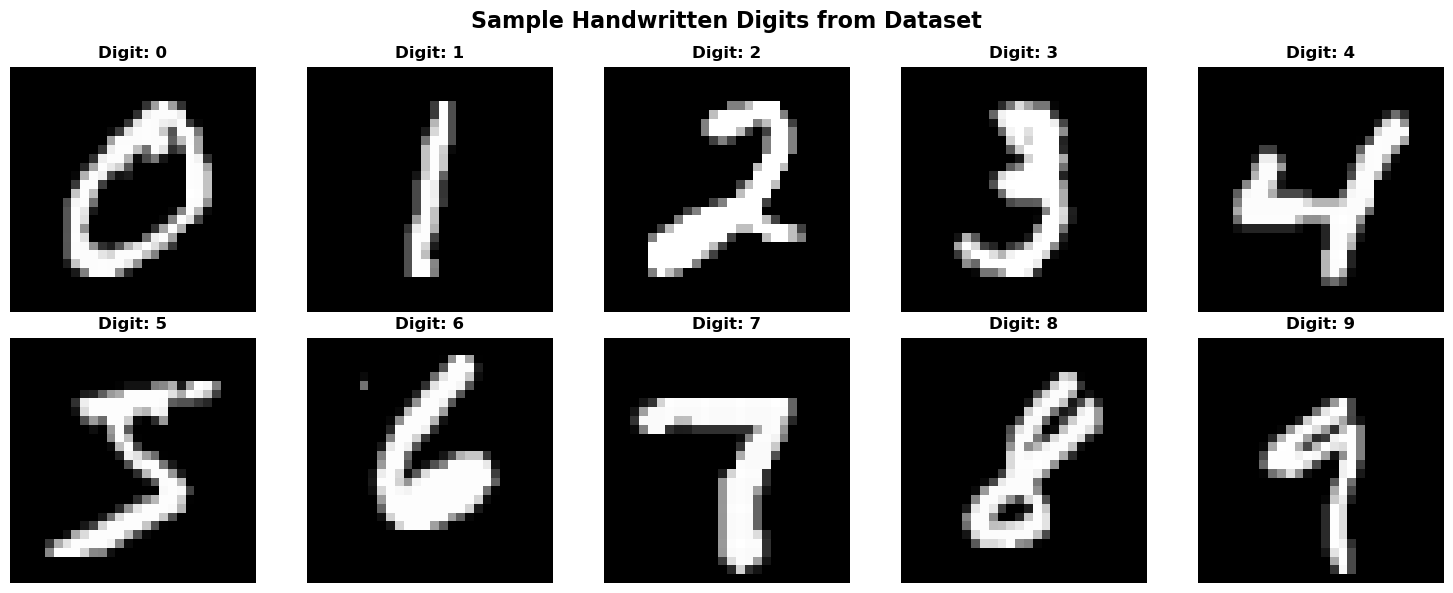

✓ Sample images visualization saved as '01_sample_images.png'


In [51]:
# Load dataset (assign to variables) and visualize sample images
X_train, y_train, X_test, y_test = load_dataset(
	data_path="C:\\Users\\CicekAkkaya\\OneDrive\\Desktop\\EHEI\\Deep_Learning\\Assignments\\mnist_data\\mnist_png"
)

# Ensure data was loaded before visualization
if X_train is None or len(X_train) == 0:
	print("No training data available. Please ensure the dataset is extracted correctly.")
else:
	# Safe visualization: handle missing classes to avoid IndexError
	def visualize_sample_images_safe(X_train, y_train):
		fig, axes = plt.subplots(2, 5, figsize=(15, 6))
		fig.suptitle('Sample Handwritten Digits from Dataset', fontsize=16, fontweight='bold')

		for digit in range(10):
			ax = axes[digit // 5, digit % 5]
			indices = np.where(y_train == digit)[0]
			if indices.size > 0:
				idx = indices[0]
				# Ensure index is within bounds for X_train
				if 0 <= idx < len(X_train):
					ax.imshow(X_train[idx], cmap='gray')
					ax.set_title(f'Digit: {digit}', fontweight='bold')
				else:
					ax.text(0.5, 0.5, 'Index OOB', ha='center', va='center')
			else:
				ax.text(0.5, 0.5, f'No samples\nfor {digit}', ha='center', va='center')
			ax.axis('off')

		plt.tight_layout()
		plt.savefig('01_sample_images.png', dpi=300, bbox_inches='tight')
		plt.show()
		print("✓ Sample images visualization saved as '01_sample_images.png'")

	# Call the safe visualizer instead of the broken one
	visualize_sample_images_safe(X_train, y_train)

In [52]:
def visualize_class_distribution(y_train, y_test):
    """Visualize class distribution in train and test sets"""
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    train_counts = np.bincount(y_train, minlength=10)
    test_counts = np.bincount(y_test, minlength=10)
    
    axes[0].bar(range(10), train_counts, color='steelblue', alpha=0.7, edgecolor='black')
    axes[0].set_title('Training Set Class Distribution', fontsize=12, fontweight='bold')
    axes[0].set_xlabel('Digit')
    axes[0].set_ylabel('Count')
    axes[0].grid(axis='y', alpha=0.3)
    
    axes[1].bar(range(10), test_counts, color='coral', alpha=0.7, edgecolor='black')
    axes[1].set_title('Testing Set Class Distribution', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('Digit')
    axes[1].set_ylabel('Count')
    axes[1].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('02_class_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("✓ Class distribution visualization saved as '02_class_distribution.png'")


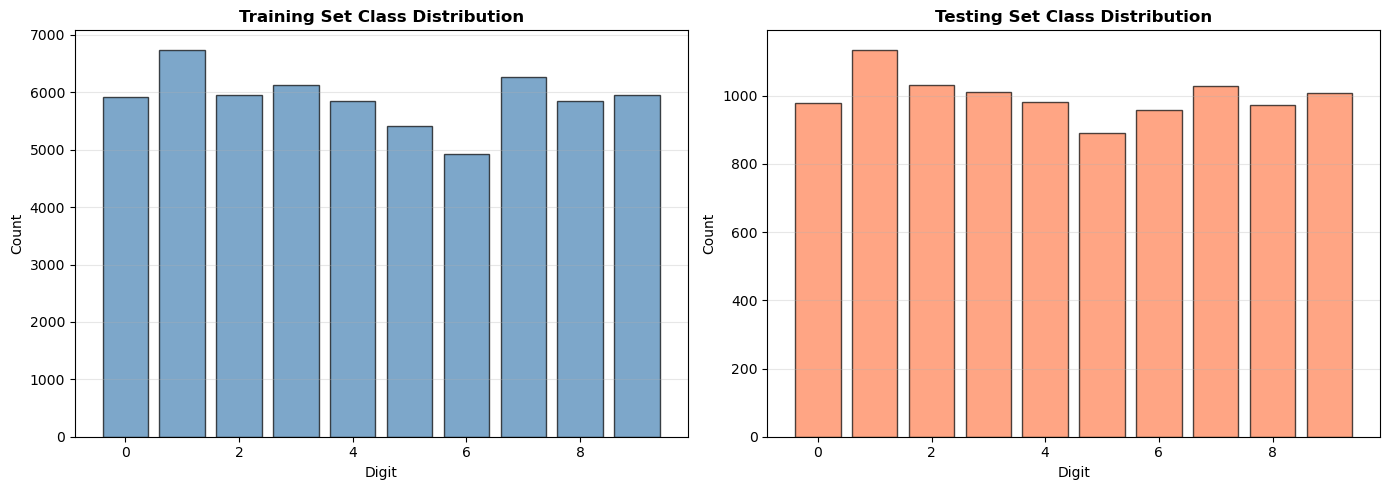

✓ Class distribution visualization saved as '02_class_distribution.png'


In [53]:
visualize_class_distribution(y_train, y_test)

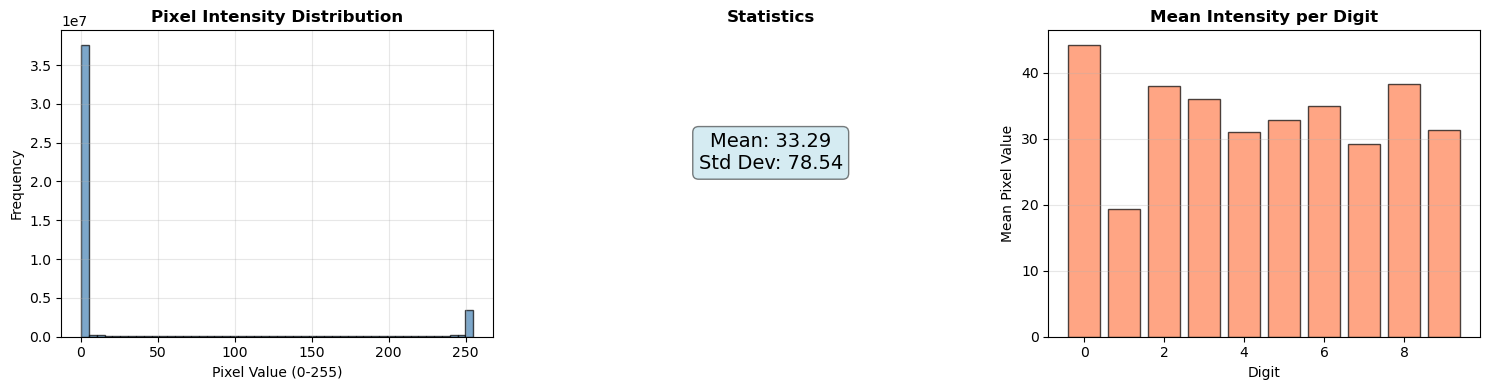

✓ Pixel statistics visualization saved as '03_pixel_statistics.png'


In [54]:
def visualize_image_statistics(X_train):
    """Visualize pixel intensity statistics"""
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    
    flat_pixels = X_train.reshape(-1)
    
    axes[0].hist(flat_pixels, bins=50, color='steelblue', alpha=0.7, edgecolor='black')
    axes[0].set_title('Pixel Intensity Distribution', fontweight='bold')
    axes[0].set_xlabel('Pixel Value (0-255)')
    axes[0].set_ylabel('Frequency')
    axes[0].grid(alpha=0.3)
    
    mean_intensity = np.mean(flat_pixels)
    std_intensity = np.std(flat_pixels)
    axes[1].text(0.5, 0.6, f'Mean: {mean_intensity:.2f}\nStd Dev: {std_intensity:.2f}',
                ha='center', va='center', fontsize=14, bbox=dict(boxstyle='round', 
                facecolor='lightblue', alpha=0.5))
    axes[1].axis('off')
    axes[1].set_title('Statistics', fontweight='bold')
    
    sample_means = [np.mean(X_train[np.where(y_train == i)[0]]) for i in range(10)]
    axes[2].bar(range(10), sample_means, color='coral', alpha=0.7, edgecolor='black')
    axes[2].set_title('Mean Intensity per Digit', fontweight='bold')
    axes[2].set_xlabel('Digit')
    axes[2].set_ylabel('Mean Pixel Value')
    axes[2].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('03_pixel_statistics.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("✓ Pixel statistics visualization saved as '03_pixel_statistics.png'")
visualize_image_statistics(X_train)

# DATA PREPROCESSING

In [55]:
def preprocess_data(X_train, y_train, X_test, y_test):
    """Normalize and reshape data for CNN"""
    # Normalize pixel values to [0, 1]
    X_train = X_train.astype('float32') / 255.0
    X_test = X_test.astype('float32') / 255.0
    
    # Reshape to (samples, height, width, channels)
    X_train = X_train.reshape(-1, 28, 28, 1)
    X_test = X_test.reshape(-1, 28, 28, 1)
    
    # Convert labels to one-hot encoding
    y_train = keras.utils.to_categorical(y_train, 10)
    y_test = keras.utils.to_categorical(y_test, 10)
    
    return X_train, y_train, X_test, y_test
X_train, y_train, X_test, y_test = preprocess_data(X_train, y_train, X_test, y_test)

# CNN MODEL

In [56]:
def build_cnn_model():
    """Build and compile CNN model"""
    model = models.Sequential([
        # First Convolutional Block
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        
        # Second Convolutional Block
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        
        # Third Convolutional Block
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        
        # Flatten and Dense Layers
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model
model = build_cnn_model()
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 10, 10, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 2, 2, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 2, 2, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 128)            │           51

 Total params: 208,874 (815.91 KB)

 Trainable params: 207,466 (810.41 KB)

 Non-trainable params: 1,408 (5.50 KB)

# MODEL TRAINING

In [58]:
def train_model(model, X_train, y_train, X_test, y_test, epochs=20, batch_size=128):
    """Train the CNN model with data augmentation"""
    # Data augmentation
    datagen = ImageDataGenerator(
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.1
    )
    
    history = model.fit(
        datagen.flow(X_train, y_train, batch_size=batch_size),
        epochs=epochs,
        validation_data=(X_test, y_test),
        verbose=1
    )
    
    return history
history = train_model(model, X_train, y_train, X_test, y_test, epochs=20, batch_size=128)

Epoch 1/20
461/461 ━━━━━━━━━━━━━━━━━━━━ 31s 58ms/step - accuracy: 0.7683 - loss: 0.7607 - val_accuracy: 0.9053 - val_loss: 0.3103
Epoch 2/20
461/461 ━━━━━━━━━━━━━━━━━━━━ 23s 49ms/step - accuracy: 0.9507 - loss: 0.1701 - val_accuracy: 0.9841 - val_loss: 0.0500
Epoch 3/20
461/461 ━━━━━━━━━━━━━━━━━━━━ 26s 57ms/step - accuracy: 0.9660 - loss: 0.1185 - val_accuracy: 0.9900 - val_loss: 0.0335
Epoch 4/20
461/461 ━━━━━━━━━━━━━━━━━━━━ 27s 59ms/step - accuracy: 0.9712 - loss: 0.0978 - val_accuracy: 0.9914 - val_loss: 0.0269
Epoch 5/20
461/461 ━━━━━━━━━━━━━━━━━━━━ 27s 59ms/step - accuracy: 0.9760 - loss: 0.0850 - val_accuracy: 0.9922 - val_loss: 0.0238
Epoch 6/20
461/461 ━━━━━━━━━━━━━━━━━━━━ 27s 59ms/step - accuracy: 0.9788 - loss: 0.0756 - val_accuracy: 0.9929 - val_loss: 0.0228
Epoch 7/20
461/461 ━━━━━━━━━━━━━━━━━━━━ 27s 59ms/step - accuracy: 0.9808 - loss: 0.0680 - val_accuracy: 0.9942 - val_loss: 0.0173
Epoch 8/20
461/461 ━━━━━━━━━━━━━━━━━━━━ 27s 59ms/step - accuracy: 0.9809 - loss: 0.0663 - 

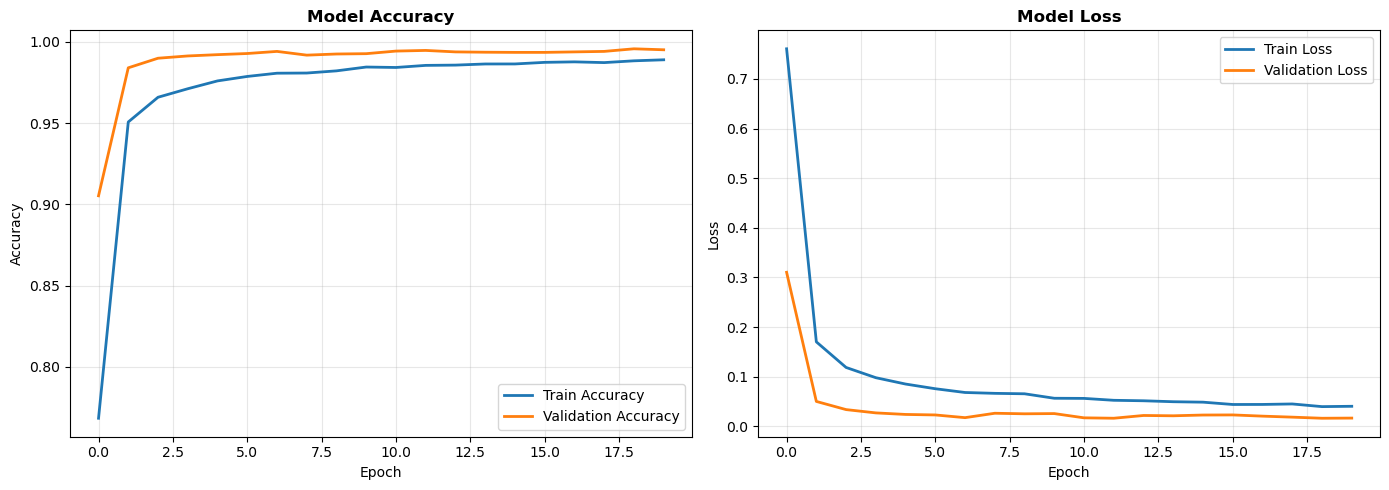

✓ Training history saved as '04_training_history.png'


In [60]:
def plot_training_history(history):
    """Plot training and validation accuracy/loss"""
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    axes[0].plot(history.history['accuracy'], label='Train Accuracy', linewidth=2)
    axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
    axes[0].set_title('Model Accuracy', fontsize=12, fontweight='bold')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Accuracy')
    axes[0].legend()
    axes[0].grid(alpha=0.3)
    
    axes[1].plot(history.history['loss'], label='Train Loss', linewidth=2)
    axes[1].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
    axes[1].set_title('Model Loss', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Loss')
    axes[1].legend()
    axes[1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('04_training_history.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("✓ Training history saved as '04_training_history.png'")
plot_training_history(history)

# MODEL EVALUATION

In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical

y_test_original = y_test # Sizin orijinal etiket diziniz

# Specifyin class number
num_classes = 10 

# ONE-HOT ENCODING
y_test_encoded = to_categorical(y_test_original, num_classes=num_classes)


print("Original Label Shape:", y_test_original.shape)
print("One-Hot Label Shape(y_test_encoded):", y_test_encoded.shape)

Original Label Shape: (10000, 10)
One-Hot Label Shape (y_test_encoded): (10000, 10, 10)
First 5 Original Labels: [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
First 5 One-Hot Labels:
 [[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 1. 0. 

In [73]:
print("First 5 Original Labels:", y_test_original[:5])
print("First 5 One-Hot Labels:\n", y_test_encoded[:5])

First 5 Original Labels: [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
First 5 One-Hot Labels:
 [[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [77]:
def evaluate_model(model, X_test, y_test, y_test_encoded):
    """Generate predictions and evaluation metrics"""
    y_pred_probs = model.predict(X_test, verbose=0)
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_true = np.argmax(y_test_encoded, axis=1)
    
    return y_true, y_pred, y_pred_probs
y_true, y_pred, y_pred_probs = evaluate_model(model, X_test, y_test, y_test)
evaluate_model(model, X_test, y_test, y_test)

(array([0, 0, 0, ..., 9, 9, 9], dtype=int64),
 array([0, 0, 0, ..., 9, 9, 9], dtype=int64),
 array([[9.99987721e-01, 2.22281443e-07, 1.83239649e-07, ...,
         2.03715922e-06, 1.06369566e-06, 2.78551079e-06],
        [9.99988794e-01, 2.16132605e-07, 1.62058285e-07, ...,
         7.53710992e-07, 9.12070391e-07, 9.97090865e-07],
        [9.99949574e-01, 4.85439216e-07, 3.92405610e-07, ...,
         1.71446413e-06, 3.32331228e-06, 1.98254884e-06],
        ...,
        [2.21195080e-07, 6.74134810e-08, 7.04138330e-08, ...,
         1.87707860e-06, 1.32937851e-06, 9.99967456e-01],
        [1.34058255e-05, 4.79593518e-06, 2.17917859e-05, ...,
         1.54375564e-04, 9.67130472e-05, 9.98493195e-01],
        [4.56273398e-07, 1.03884183e-07, 1.25898652e-07, ...,
         1.85359067e-06, 1.66926350e-06, 9.99947786e-01]], dtype=float32))

In [78]:
evaluate_model(model, X_test, y_test, y_test_encoded)

(array([[1, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 9, 0, ..., 0, 0, 0],
        [0, 9, 0, ..., 0, 0, 0],
        [0, 9, 0, ..., 0, 0, 0]], dtype=int64),
 array([0, 0, 0, ..., 9, 9, 9], dtype=int64),
 array([[9.99987721e-01, 2.22281443e-07, 1.83239649e-07, ...,
         2.03715922e-06, 1.06369566e-06, 2.78551079e-06],
        [9.99988794e-01, 2.16132605e-07, 1.62058285e-07, ...,
         7.53710992e-07, 9.12070391e-07, 9.97090865e-07],
        [9.99949574e-01, 4.85439216e-07, 3.92405610e-07, ...,
         1.71446413e-06, 3.32331228e-06, 1.98254884e-06],
        ...,
        [2.21195080e-07, 6.74134810e-08, 7.04138330e-08, ...,
         1.87707860e-06, 1.32937851e-06, 9.99967456e-01],
        [1.34058255e-05, 4.79593518e-06, 2.17917859e-05, ...,
         1.54375564e-04, 9.67130472e-05, 9.98493195e-01],
        [4.56273398e-07, 1.03884183e-07, 1.25898652e-07, ...,
         1.85359067e-06, 1.66926350e-06, 9.99947786e-

In [79]:
y_true_labels, y_pred_labels, y_pred_probabilities = evaluate_model(
    model, 
    X_test, 
    y_test, 
    y_test_encoded
)

In [80]:
# Visualize the results
print("True Labels (First 5):", y_true_labels[:5])
print("Predictable Labels (First 5):", y_pred_labels[:5])
print("Prediction Probabilities(First 1):", y_pred_probabilities[0])

True Labels (First 5): [[1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]]
Predictable Labels (First 5): [0 0 0 0 0]
Prediction Probabilities(First 1): [9.9998772e-01 2.2228144e-07 1.8323965e-07 9.2125674e-08 2.2051020e-07
 5.0670377e-07 5.1910179e-06 2.0371592e-06 1.0636957e-06 2.7855108e-06]


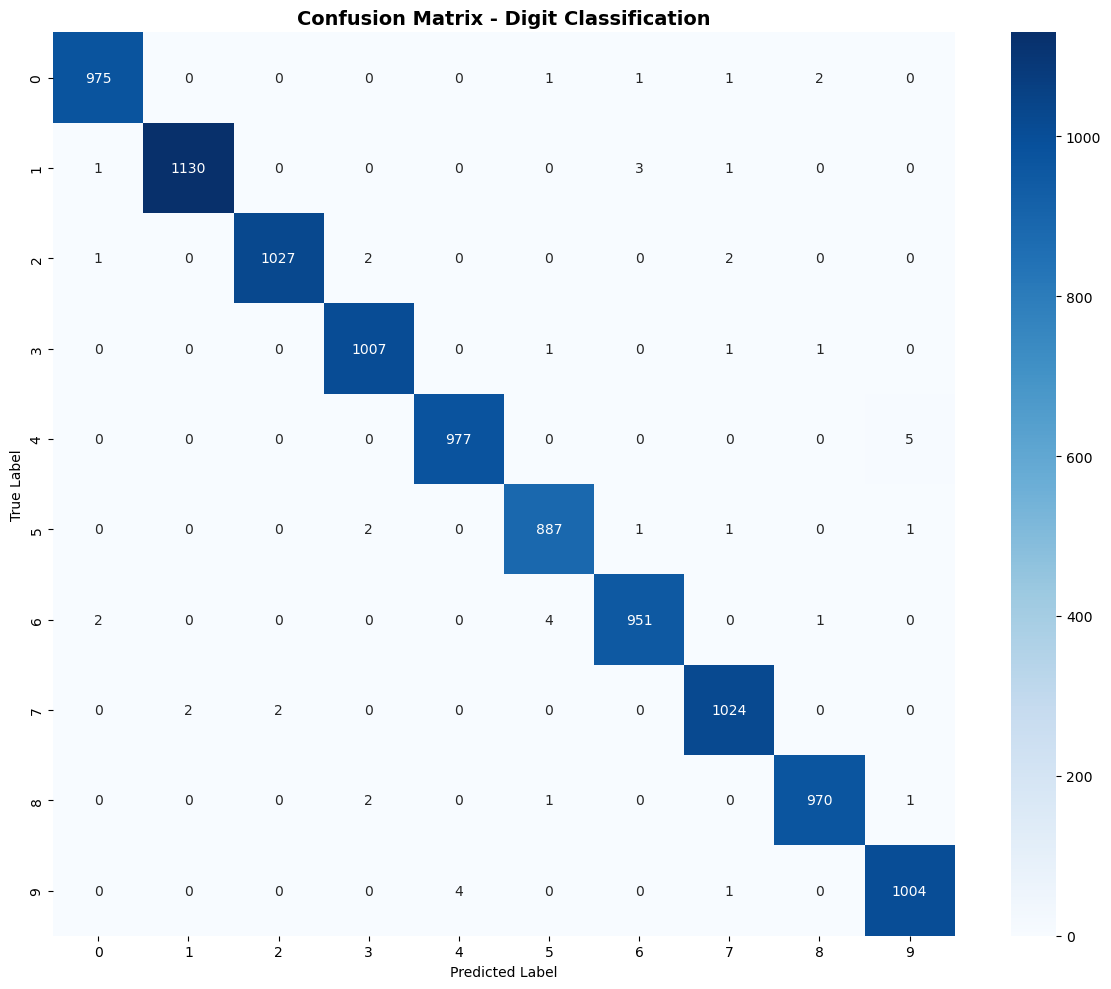

✓ Confusion matrix saved as '05_confusion_matrix.png'


In [82]:
def plot_confusion_matrix(y_true, y_pred):
    """Plot confusion matrix"""
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
                xticklabels=range(10), yticklabels=range(10))
    plt.title('Confusion Matrix - Digit Classification', fontsize=14, fontweight='bold')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.savefig('05_confusion_matrix.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("✓ Confusion matrix saved as '05_confusion_matrix.png'")
plot_confusion_matrix(y_true, y_pred)

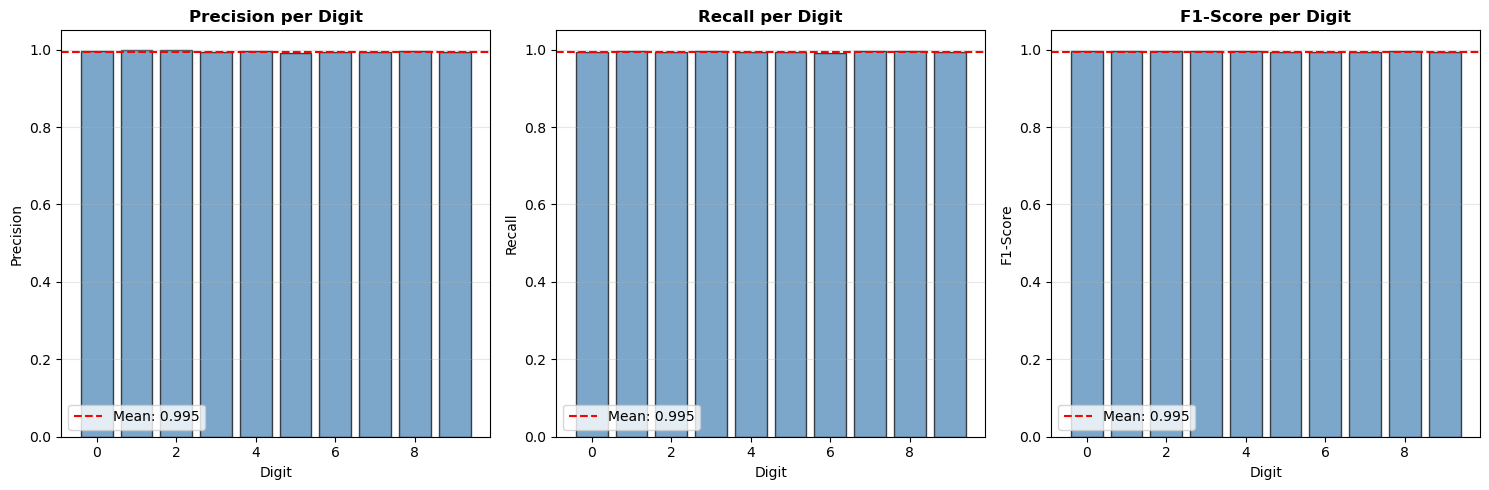

✓ Classification metrics saved as '06_classification_metrics.png'


In [83]:
def plot_classification_metrics(y_true, y_pred):
    """Plot per-class precision, recall, and F1-score"""
    precision = precision_score(y_true, y_pred, average=None)
    recall = recall_score(y_true, y_pred, average=None)
    f1 = f1_score(y_true, y_pred, average=None)
    
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    for idx, (metric, values, title) in enumerate([(precision, precision, 'Precision'),
                                                     (recall, recall, 'Recall'),
                                                     (f1, f1, 'F1-Score')]):
        axes[idx].bar(range(10), values, color='steelblue', alpha=0.7, edgecolor='black')
        axes[idx].set_title(f'{title} per Digit', fontweight='bold')
        axes[idx].set_xlabel('Digit')
        axes[idx].set_ylabel(title)
        axes[idx].set_ylim([0, 1.05])
        axes[idx].grid(axis='y', alpha=0.3)
        axes[idx].axhline(y=np.mean(values), color='red', linestyle='--', 
                         label=f'Mean: {np.mean(values):.3f}')
        axes[idx].legend()
    
    plt.tight_layout()
    plt.savefig('06_classification_metrics.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("✓ Classification metrics saved as '06_classification_metrics.png'")
plot_classification_metrics(y_true, y_pred)

In [84]:
def print_detailed_report(y_true, y_pred):
    """Print detailed classification report"""
    report = classification_report(y_true, y_pred, target_names=[str(i) for i in range(10)])
    print("\n" + "="*70)
    print("DETAILED CLASSIFICATION REPORT")
    print("="*70)
    print(report)
    
    accuracy = accuracy_score(y_true, y_pred)
    precision_macro = precision_score(y_true, y_pred, average='macro')
    recall_macro = recall_score(y_true, y_pred, average='macro')
    f1_macro = f1_score(y_true, y_pred, average='macro')
    
    print("\n" + "="*70)
    print("OVERALL METRICS")
    print("="*70)
    print(f"Accuracy:        {accuracy:.4f} ({accuracy*100:.2f}%)")
    print(f"Precision (Macro): {precision_macro:.4f}")
    print(f"Recall (Macro):    {recall_macro:.4f}")
    print(f"F1-Score (Macro):  {f1_macro:.4f}")
    print("="*70 + "\n")
print_detailed_report(y_true, y_pred)


DETAILED CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       980
           1       1.00      1.00      1.00      1135
           2       1.00      1.00      1.00      1032
           3       0.99      1.00      1.00      1010
           4       1.00      0.99      1.00       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      1.00      0.99      1028
           8       1.00      1.00      1.00       974
           9       0.99      1.00      0.99      1009

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000


OVERALL METRICS
Accuracy:        0.9952 (99.52%)
Precision (Macro): 0.9951
Recall (Macro):    0.9952
F1-Score (Macro):  0.9952



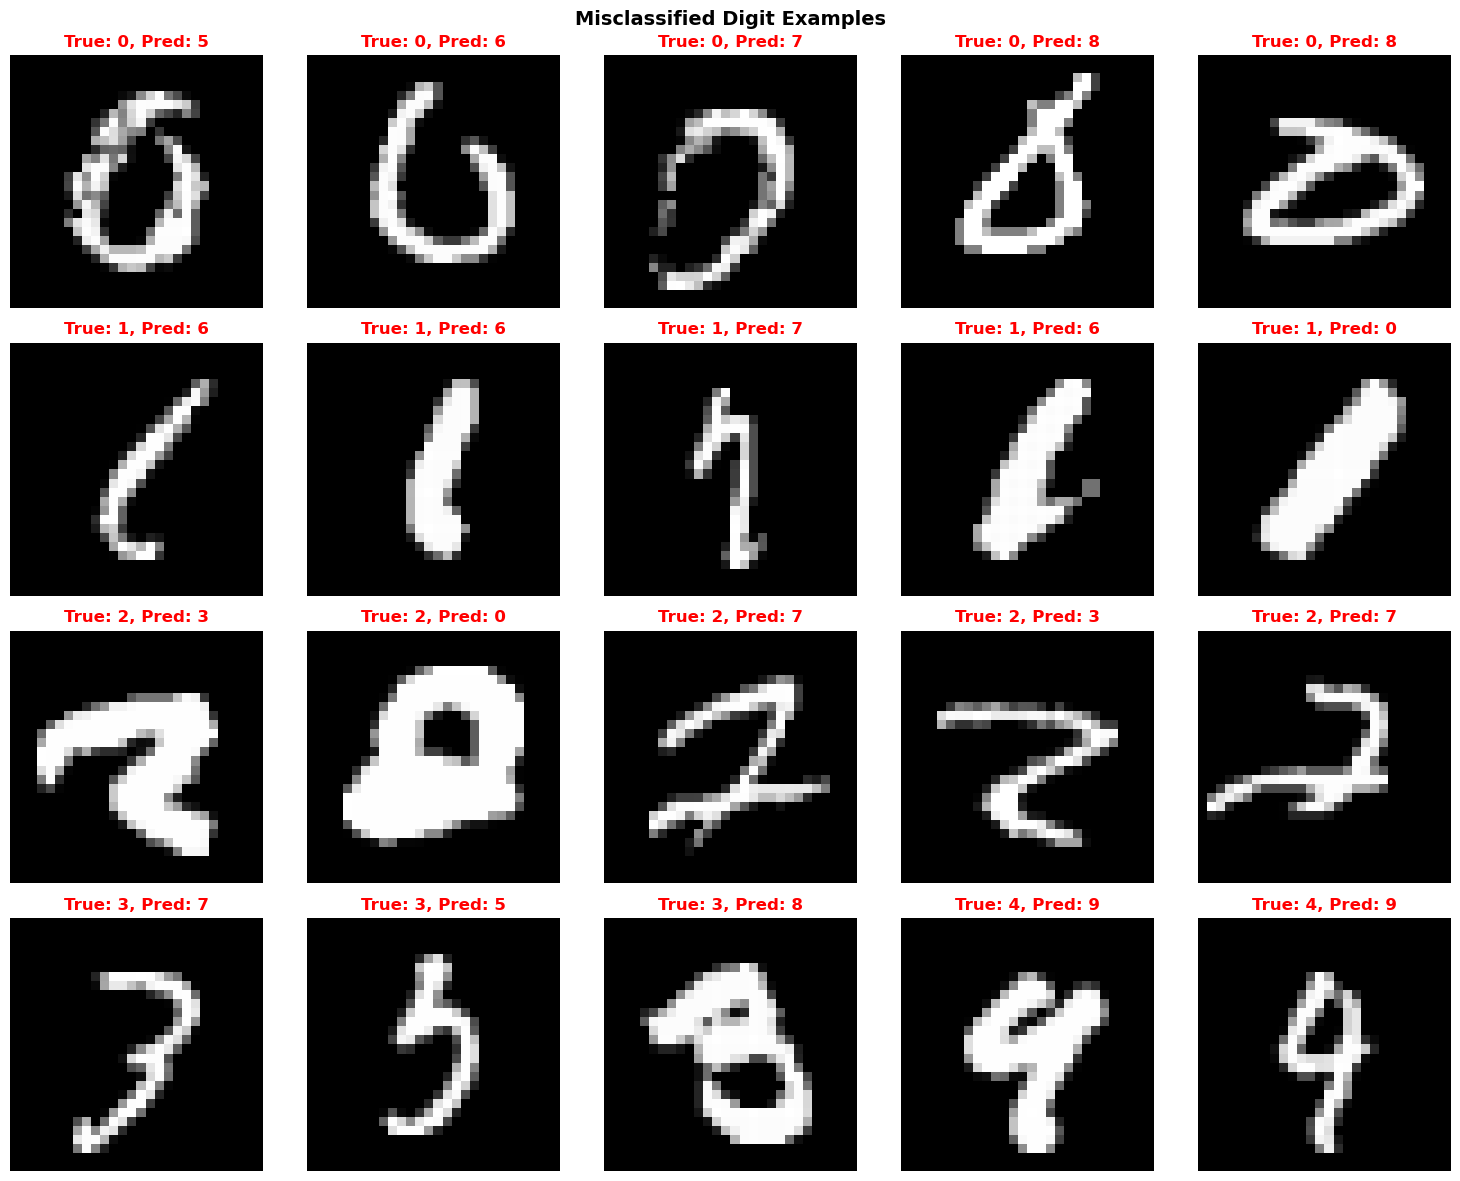

✓ Misclassified examples saved as '07_misclassified_examples.png' (20 shown)


In [85]:
def plot_misclassified_examples(X_test, y_true, y_pred):
    """Visualize misclassified examples"""
    misclassified_idx = np.where(y_true != y_pred)[0]
    
    if len(misclassified_idx) == 0:
        print("No misclassified examples!")
        return
    
    n_samples = min(20, len(misclassified_idx))
    fig, axes = plt.subplots(4, 5, figsize=(15, 12))
    fig.suptitle('Misclassified Digit Examples', fontsize=14, fontweight='bold')
    
    for i in range(n_samples):
        ax = axes[i // 5, i % 5]
        idx = misclassified_idx[i]
        ax.imshow(X_test[idx].reshape(28, 28), cmap='gray')
        ax.set_title(f'True: {y_true[idx]}, Pred: {y_pred[idx]}', 
                    color='red', fontweight='bold')
        ax.axis('off')
    
    plt.tight_layout()
    plt.savefig('07_misclassified_examples.png', dpi=300, bbox_inches='tight')
    plt.show()
    print(f"✓ Misclassified examples saved as '07_misclassified_examples.png' ({n_samples} shown)")
plot_misclassified_examples(X_test, y_true, y_pred)

In [90]:
 # Save model
print("Saving Model...")
# Add a valid extension (.keras recommended) to avoid ValueError from model.save
model.save('mnist_cnn_model.keras')
print("✓ Model saved as 'mnist_cnn_model.keras'")
	
print("\n" + "="*70)
print("ANALYSIS COMPLETE!")
print("="*70)
print("\nGenerated visualization files:")
print("  • 01_sample_images.png - Sample digits from dataset")
print("  • 02_class_distribution.png - Train/test split distribution")
print("  • 03_pixel_statistics.png - Pixel intensity analysis")
print("  • 04_training_history.png - Accuracy and loss curves")
print("  • 05_confusion_matrix.png - Detailed confusion matrix")
print("  • 06_classification_metrics.png - Per-class metrics")
print("  • 07_misclassified_examples.png - Examples of errors")
print("="*70)

Saving Model...
✓ Model saved as 'mnist_cnn_model.keras'

ANALYSIS COMPLETE!

Generated visualization files:
  • 01_sample_images.png - Sample digits from dataset
  • 02_class_distribution.png - Train/test split distribution
  • 03_pixel_statistics.png - Pixel intensity analysis
  • 04_training_history.png - Accuracy and loss curves
  • 05_confusion_matrix.png - Detailed confusion matrix
  • 06_classification_metrics.png - Per-class metrics
  • 07_misclassified_examples.png - Examples of errors
